In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
df = pd.read_csv('cleared_data.csv')
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6,summer,1.254446e+09,90.089386


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10731 entries, 0 to 10730
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   original_title        10731 non-null  object 
 2   cast                  10731 non-null  object 
 3   director              10731 non-null  object 
 4   runtime               10731 non-null  int64  
 5   genres                10731 non-null  object 
 6   production_companies  10731 non-null  object 
 7   release_date          10731 non-null  object 
 8   vote_count            10731 non-null  int64  
 9   vote_average          10731 non-null  float64
 10  release_year          10731 non-null  int64  
 11  budget_adj            10731 non-null  float64
 12  revenue_adj           10731 non-null  float64
 13  release_month_name    10731 non-null  object 
 14  release_month_num     10731 non-null  int64  
 15  release_quarter    

# Examining the Big picture of movies industry

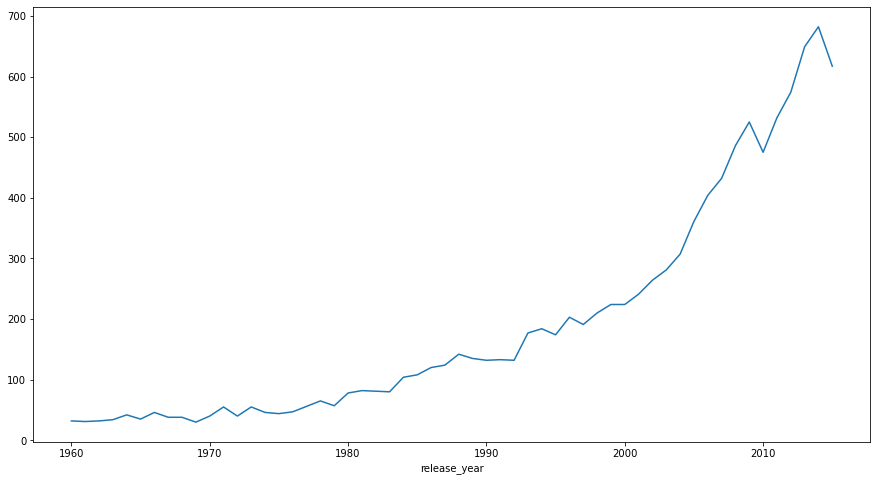

In [150]:
#trend shows the number movies produced in the last years
#df['release_year'].value_counts().plot(figsize=(15,8));
df.groupby(['release_year'])['original_title'].count().plot(figsize=(15,8));

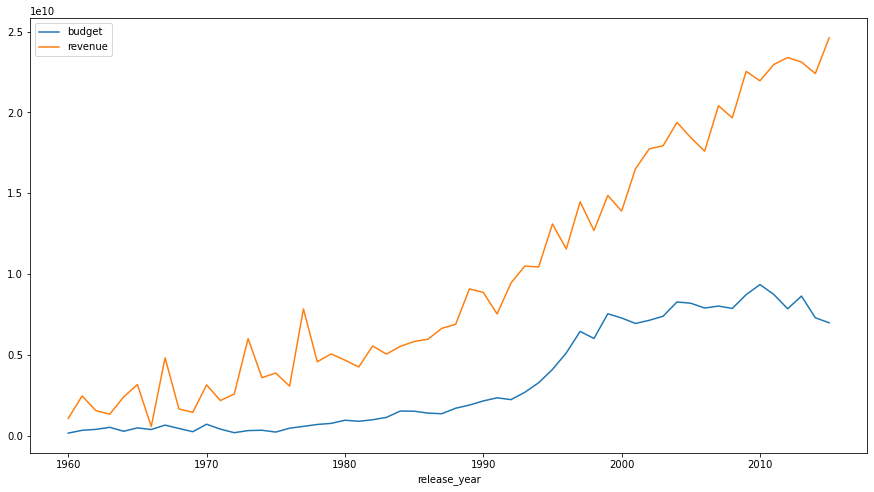

In [151]:
#plot showing the trend of revenues against investments in movie industry
df.groupby(by='release_year')['budget_adj'].sum().plot(figsize=(15,8), label='budget');
df.groupby(by='release_year')['revenue_adj'].sum().plot(figsize=(15,8), label='revenue');
plt.legend();

# Deep look in seasons weights

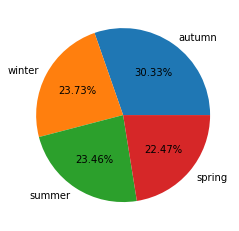

In [152]:
release_quarter_count = df['release_quarter'].value_counts()
plt.pie(release_quarter_count, labels=release_quarter_count.index, autopct='%1.2f%%');
#it's obvious that most NUMBER of movies are released in both autumn and summer seasons (almost 54%)

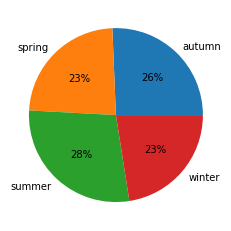

In [153]:
release_quarter_budget = df.groupby('release_quarter')['budget_adj'].sum()
plt.pie(release_quarter_budget, labels=release_quarter_budget.index, autopct='%1.0f%%');
#also most  money invested in movies industry were used for movies  released in both autumn and summer seasons (almost 54%)

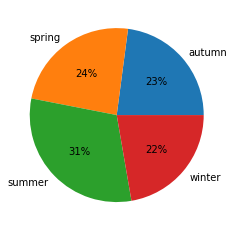

In [154]:
release_quarter_revenue = df.groupby('release_quarter')['revenue_adj'].sum()
plt.pie(release_quarter_revenue, labels=release_quarter_revenue.index, autopct='%1.0f%%');
# most profits were generated in movies released in both autumn and summer seasons (almost 54%)

# Deep look in movies rates & reviews

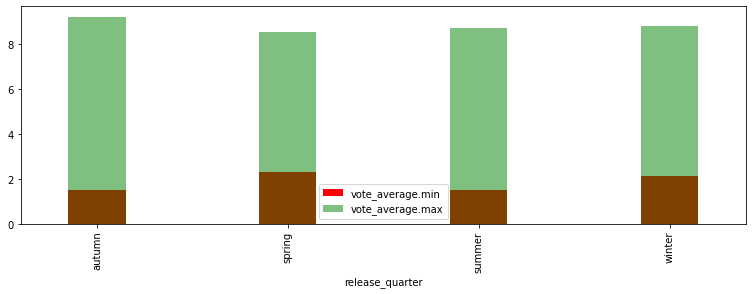

In [155]:
vmax = df.groupby(by='release_quarter')['vote_average'].max()
vmin = df.groupby(by='release_quarter')['vote_average'].min()
vmin.plot(kind='bar',alpha=1.0, color='r',width=0.3, label='vote_average.min',figsize=(13,4));
vmax.plot(kind='bar',alpha=0.5, color='g',width=0.3, label='vote_average.max',figsize=(13,4));
plt.legend();

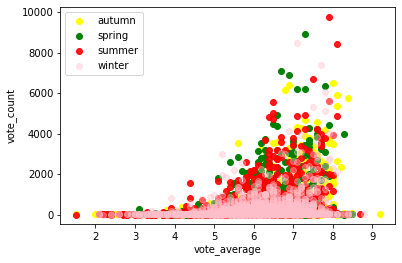

In [156]:
x_autumn=df[df['release_quarter']=='autumn']['vote_average']
y_autumn=df[df['release_quarter']=='autumn']['vote_count']

x_winter=df[df['release_quarter']=='winter']['vote_average']
y_winter=df[df['release_quarter']=='winter']['vote_count']

x_spring=df[df['release_quarter']=='spring']['vote_average']
y_spring=df[df['release_quarter']=='spring']['vote_count']

x_summer=df[df['release_quarter']=='summer']['vote_average']
y_summer=df[df['release_quarter']=='summer']['vote_count']

plt.scatter(x_autumn,y_autumn, c='yellow', label='autumn')
plt.scatter(x_spring, y_spring, c='green', label='spring')
plt.scatter(x_summer,y_summer, c='red', alpha=0.9, label='summer')
plt.scatter(x_winter,y_winter, c='pink', alpha=0.4, label='winter')
plt.xlabel('vote_average')
plt.ylabel('vote_count')

plt.legend()
#very obvious correlation between movie rating and voters count, the more count the more the rating &&& in high seasons: autumn
#summer

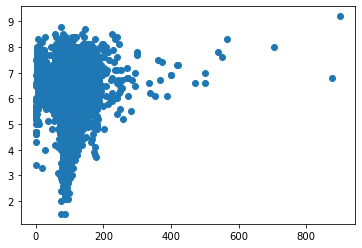

In [157]:
x = df['runtime']
y = df['vote_average']
plt.scatter(x,y)
#there is not clear correlation between runtime and vote_average

# top production companies

In [158]:
df['production_companies'].value_counts().sort_values(ascending=False).head(15)

unknown                                   959
Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       75
Metro-Goldwyn-Mayer (MGM)                  72
Columbia Pictures                          72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
TriStar Pictures                           45
Orion Pictures                             42
Miramax Films                              32
Columbia Pictures Corporation              31
Name: production_companies, dtype: int64

In [159]:
top_production_companies_list = list(df['production_companies'].value_counts().sort_values(ascending=False).head(15).index)
top_production_companies_list.remove('unknown')
top_production_companies_list

['Paramount Pictures',
 'Universal Pictures',
 'Warner Bros.',
 'Walt Disney Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Columbia Pictures',
 'New Line Cinema',
 'Touchstone Pictures',
 '20th Century Fox',
 'Twentieth Century Fox Film Corporation',
 'TriStar Pictures',
 'Orion Pictures',
 'Miramax Films',
 'Columbia Pictures Corporation']

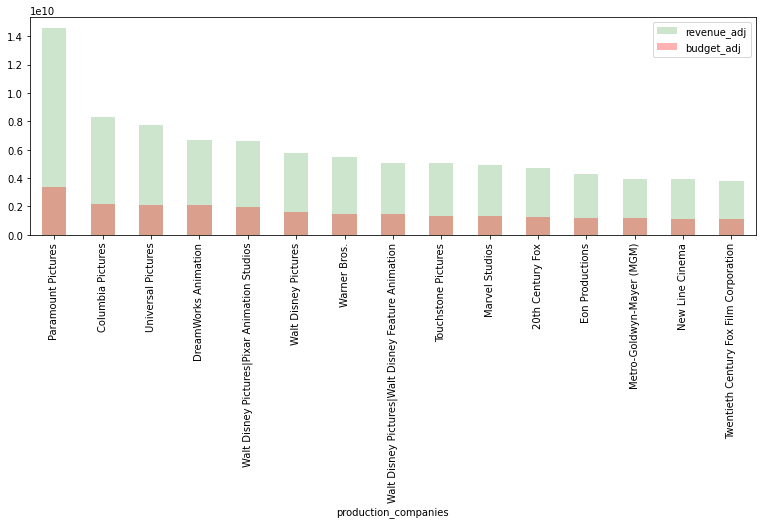

In [160]:
df.groupby(by='production_companies')['revenue_adj'].sum().sort_values(ascending=False).head(15).plot(kind='bar',alpha=0.2, color='g', figsize=(13,4));
df.groupby(by='production_companies')['budget_adj'].sum().sort_values(ascending=False).head(15).plot(kind='bar',alpha=0.3, color='r',figsize=(13,4));
plt.legend();

# Top genres

In [161]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Drama                   710
Comedy                  707
Drama|Romance           289
Comedy|Drama            280
Documentary             274
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         84
Name: genres, dtype: int64

In [162]:
#generate a list of all unique genres

genres_list = list(df['genres'].value_counts().index)
genres_cleared_list = set('')
for x in genres_list:
    genres_items = x.split('|')
    for y in genres_items:
        genres_cleared_list.add(y)
genres_cleared_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [163]:
#generating a dictionary containig movie genre, count of movies produced, sum of budget and sum of revenues
genresdictionary = {}
#car.update({"color": "White"})
for i in genres_cleared_list:
    genre_count = df[df['genres'].str.contains(i)]['original_title'].count()
    genre_budget = df[df['genres'].str.contains(i)]['budget_adj'].sum()
    genre_revenue = df[df['genres'].str.contains(i)]['revenue_adj'].sum()
    genre_average_vote = df[df['genres'].str.contains(i)]['vote_average'].mean()
    genresdictionary[i] = [genre_count,genre_budget,genre_revenue, genre_average_vote]

genresdictionary

{'Music': [399, 5288722331.348946, 19034512679.734535, 6.465664160400995],
 'Adventure': [1465, 64631820238.64912, 208404260439.09265, 5.935426621160418],
 'TV Movie': [162, 49435593.746161476, 58389103.0363306, 5.741975308641979],
 'Mystery': [808, 15780668556.112122, 41220329758.653595, 5.946534653465342],
 'Western': [164, 4042077516.938925, 7606708628.896797, 6.083536585365854],
 'Drama': [4746, 70687039502.37701, 192373334764.32315, 6.1636114622840354],
 'Family': [1214, 33132836843.769497, 108003890251.53162, 5.9869028006589895],
 'Comedy': [3775, 60376684537.97299, 181662185654.68814, 5.900927152317877],
 'Animation': [664, 17678808381.315037, 59594032711.906044, 6.384789156626514],
 'Action': [2376, 78576900376.26642, 218751719589.15384, 5.784890572390579],
 'Horror': [1636, 12711044809.21199, 39423397262.414734, 5.3377139364303146],
 'Thriller': [2902, 60121734944.61603, 160716672397.02066, 5.750310130944181],
 'Fantasy': [908, 34280572414.903355, 101890482484.80807, 5.8560572

In [164]:
gdf = pd.DataFrame.from_dict(genresdictionary, orient='index', columns =['count', 'budget','revenue', 'vote_average'])
gdf['profits%'] = (gdf['revenue']-gdf['budget'])/gdf['budget']*100
gdf

,count,budget,revenue,vote_average,profits%
Music,399,5.288722e+09,1.903451e+10,6.465664,259.907582
Adventure,1465,6.463182e+10,2.084043e+11,5.935427,222.448385
TV Movie,162,4.943559e+07,5.838910e+07,5.741975,18.111463
Mystery,808,1.578067e+10,4.122033e+10,5.946535,161.207753
Western,164,4.042078e+09,7.606709e+09,6.083537,88.188094
Drama,4746,7.068704e+10,1.923733e+11,6.163611,172.147958
Family,1214,3.313284e+10,1.080039e+11,5.986903,225.972360
Comedy,3775,6.037668e+10,1.816622e+11,5.900927,200.881354
Animation,664,1.767881e+10,5.959403e+10,6.384789,237.093041
Action,2376,7.857690e+10,2.187517e+11,5.784891,178.391892


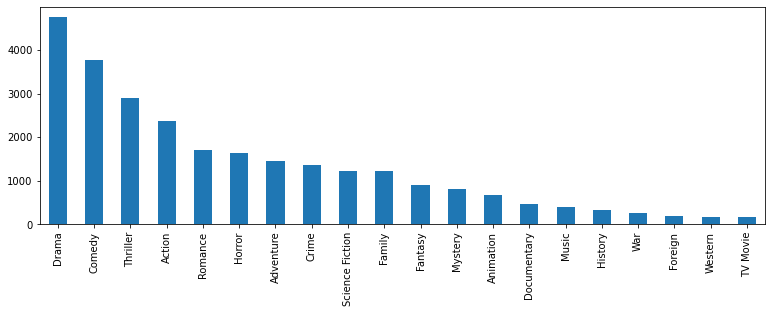

In [165]:
gdf['count'].sort_values(ascending=False).plot(kind='bar', figsize=(13,4));
# it looks that top movies in ternms of count: drama, comedy, thriller, action and romance

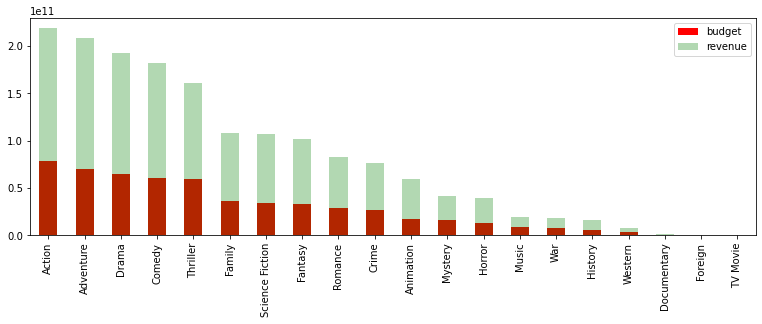

In [166]:
gdf['budget'].sort_values(ascending=False).plot(kind='bar', alpha=1, color='r',label='budget', figsize=(13,4));
gdf['revenue'].sort_values(ascending=False).plot(kind='bar',alpha=0.3, color='g', label='revenue',figsize=(13,4))
plt.legend()
# top movies in terms of money (budget and revenue) are action, adventure, drama, comedy and thriller

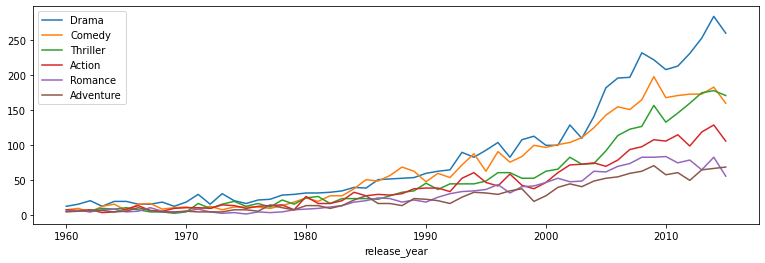

In [167]:
df[df['genres'].str.contains('Drama')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Drama', figsize=(13,4));
df[df['genres'].str.contains('Comedy')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Comedy', figsize=(13,4));
df[df['genres'].str.contains('Thriller')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Thriller', figsize=(13,4));
df[df['genres'].str.contains('Action')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Action', figsize=(13,4));
df[df['genres'].str.contains('Romance')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Romance', figsize=(13,4));
df[df['genres'].str.contains('Adventure')].groupby(by='release_year')['original_title'].count().plot(kind='line',label='Adventure', figsize=(13,4));
plt.legend();
#the number of drama, comedy and thriller movies have increased since 1980 till 2015

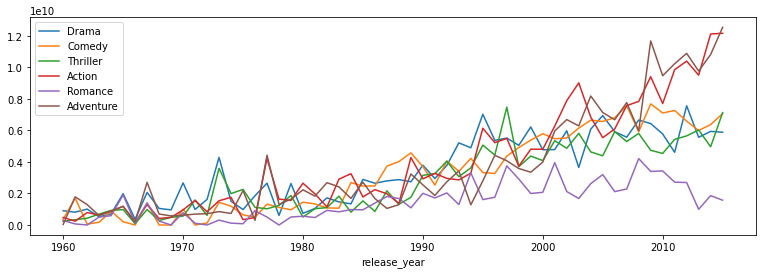

In [168]:
df[df['genres'].str.contains('Drama')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Drama', figsize=(13,4));
df[df['genres'].str.contains('Comedy')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Comedy', figsize=(13,4));
df[df['genres'].str.contains('Thriller')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Thriller', figsize=(13,4));
df[df['genres'].str.contains('Action')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Action', figsize=(13,4));
df[df['genres'].str.contains('Romance')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Romance', figsize=(13,4));
df[df['genres'].str.contains('Adventure')].groupby(by='release_year')['revenue_adj'].sum().plot(kind='line',label='Adventure', figsize=(13,4));
plt.legend();
#interesting, Adventure & action got the highest revenues

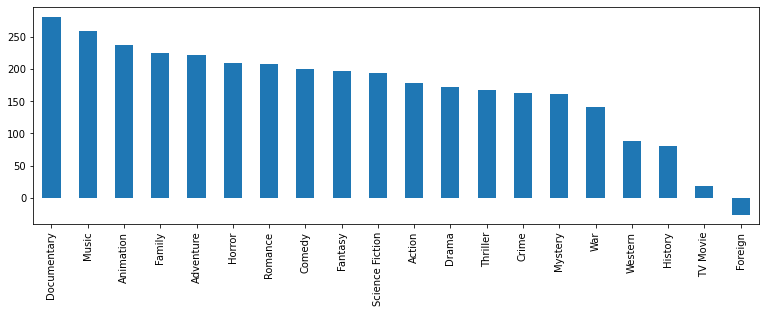

In [169]:
gdf['profits%'].sort_values(ascending=False).plot(kind='bar', alpha=1,label='profits%', figsize=(13,4));
#the ROI for romance, comedy, action and adventure movies are not far away from each others

# top directors

In [170]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Wes Craven           19
Mike Nichols         18
Rob Reiner           18
Tim Burton           18
John Carpenter       18
Name: director, dtype: int64

In [171]:
directors_list  = list (df['director'].value_counts().sort_values(ascending=False).head(50).index)
director_revenue = list (df.groupby(by='director')['revenue_adj'].sum().sort_values(ascending=False).head(300).index)
director_rate = list (df.groupby(by='director')['vote_average'].mean().sort_values(ascending=False).head(100).index)

In [172]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def outsideintersection(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    return lst3


In [173]:
vote_count_year = df.groupby(['release_year'])['vote_count'].mean()


In [174]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month_name,release_month_num,release_quarter,profit,profit%
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,6,summer,1.254446e+09,90.089386


In [175]:
year_number  = df.loc[0]['release_year']
year_location = year_number - 1960
vote_count_year.iloc[year_location]

295.22528363047

In [1]:
#add a kpi to choose best directors

df['vote_count_year_mean'] = 0
for i in range (10730):
    year_number  = df.loc[0]['release_year']
    year_location = year_number - 1960
    vote_count_year_mean = vote_count_year.iloc[year_location]
    #df.loc[i]['vote_count_year_mean'] = df.loc[i]['vote_count']/vote_count_year_mean * 100
    df.iloc[i, df.columns.get_loc('vote_count_year_mean')] = df.loc[i]['vote_count']/vote_count_year_mean * 100

NameError: name 'df' is not defined

In [177]:
director_kpi = list (df.groupby(['director'])['vote_count_year_mean'].sum().sort_values(ascending = False).head(15).index)

In [178]:
#directors having top kpi and among top directors producing movies
x = intersection(director_kpi, directors_list)
x

['Steven Spielberg',
 'Peter Jackson',
 'Ridley Scott',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Tim Burton',
 'Chris Columbus']

In [179]:
#directors having top kpi and top revenues
y= intersection(director_kpi, director_revenue)
y

['Christopher Nolan',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Ridley Scott',
 'David Fincher',
 'James Cameron',
 'Robert Zemeckis',
 'Martin Scorsese',
 'Michael Bay',
 'Tim Burton',
 'Chris Columbus',
 'J.J. Abrams',
 'Francis Lawrence',
 'Bryan Singer']

In [180]:
nominated_directors = outsideintersection(y,x)
nominated_directors

['Christopher Nolan',
 'Quentin Tarantino',
 'David Fincher',
 'James Cameron',
 'Michael Bay',
 'J.J. Abrams',
 'Francis Lawrence',
 'Bryan Singer']

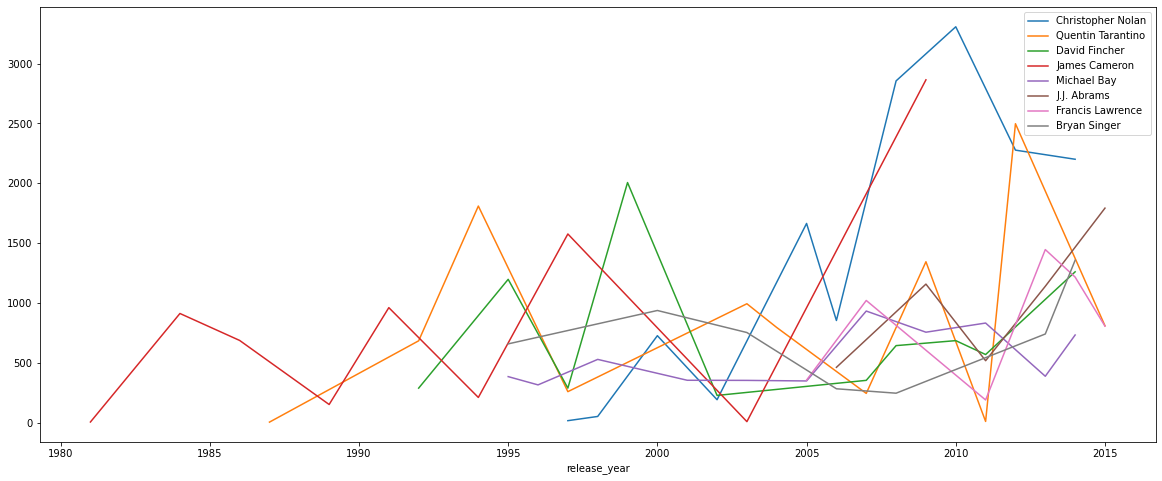

In [181]:
# top promising directors
for name in nominated_directors:
    df[df['director']==name].groupby(['release_year'])['vote_count_year_mean'].sum().plot(figsize=(20,8), label=name)
plt.legend();